In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.describe()

,2401
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


In [7]:
df = pd.DataFrame(columns = ['Texts', 'Sentiment'])
df['Texts'] = data['im getting on borderlands and i will murder you all ,']
df['Sentiment'] = data['Positive']
df.head()

,Texts,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


### Distribution of Sentiment

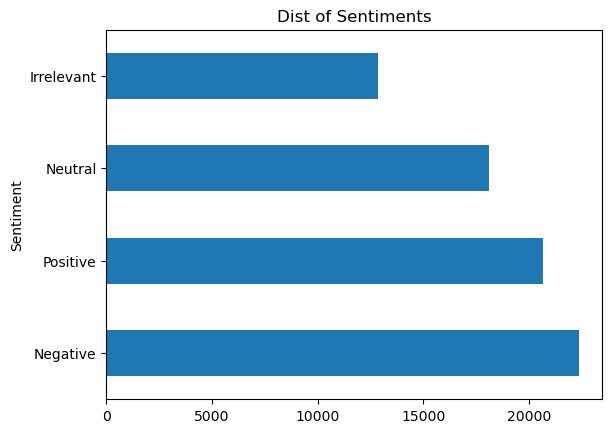

In [8]:
sentiment = df['Sentiment'].value_counts()
sentiment.plot.barh()
plt.title('Dist of Sentiments')
plt.show()

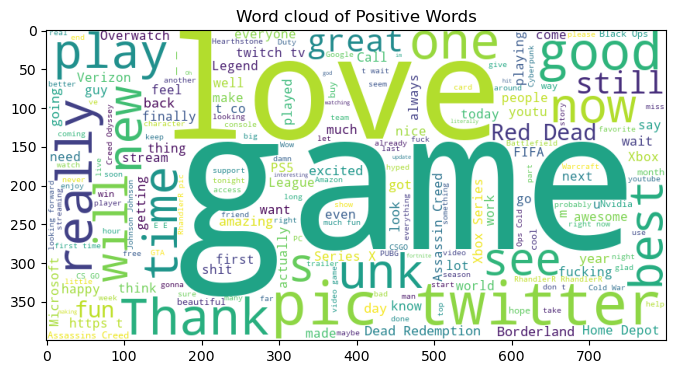

In [9]:
positive = df[df['Sentiment'] == 'Positive']
positive_text = ''.join(positive['Texts'].astype(str))
wc = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)
plt.figure(figsize = (8, 6))
plt.imshow(wc)
plt.title('Word cloud of Positive Words')
plt.show()

## Word Cloud of Sentiment

In [10]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

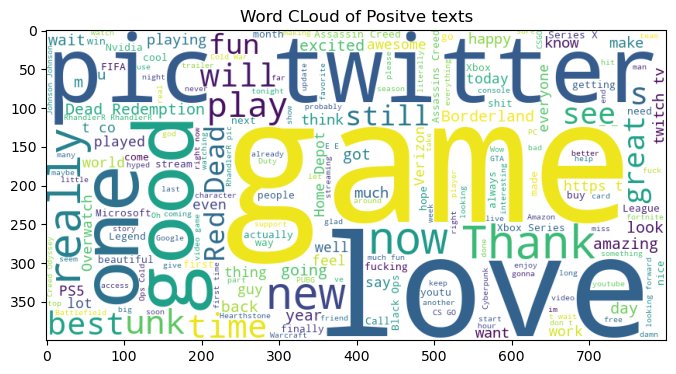

In [11]:
positive = df[df['Sentiment'] == 'Positive']
positive_text = ''.join(positive['Texts'].astype(str))
positive_wc = WordCloud(height = 400, width = 800, background_color = 'white').generate(positive_text)
plt.figure(figsize = (8,6))
plt.imshow(positive_wc)
plt.title('Word CLoud of Positve texts')
plt.show()

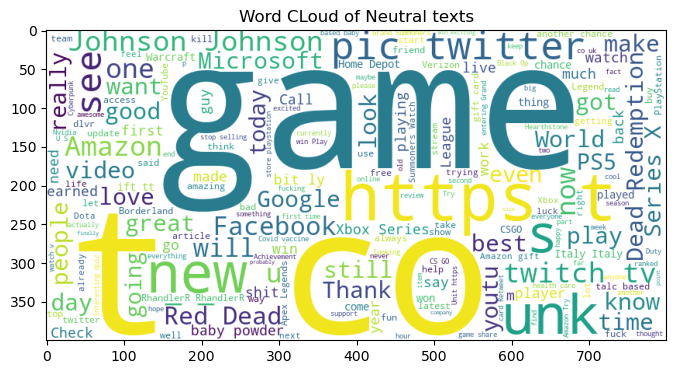

In [12]:
neutral = df[df['Sentiment'] == 'Neutral']
neutral_text = ''.join(neutral['Texts'].astype(str))
neutral_wc = WordCloud(height = 400, width = 800, background_color = 'white').generate(neutral_text)
plt.figure(figsize = (8,6))
plt.imshow(neutral_wc)
plt.title('Word CLoud of Neutral texts')
plt.show()

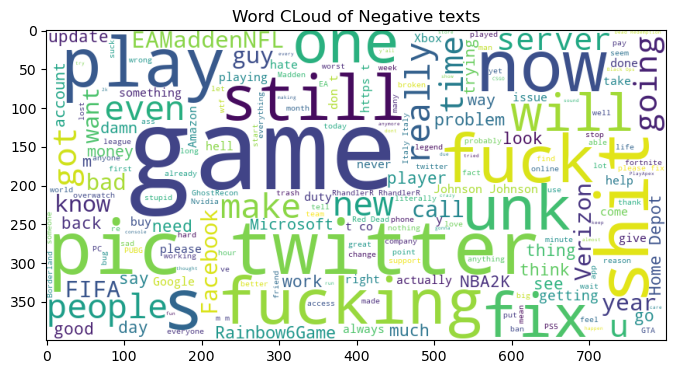

In [13]:
negative = df[df['Sentiment'] == 'Negative']
negative_text = ''.join(negative['Texts'].astype(str))
negative_wc = WordCloud(height = 400, width = 800, background_color = 'white').generate(negative_text)
plt.figure(figsize = (8,6))
plt.imshow(negative_wc)
plt.title('Word CLoud of Negative texts')
plt.show()

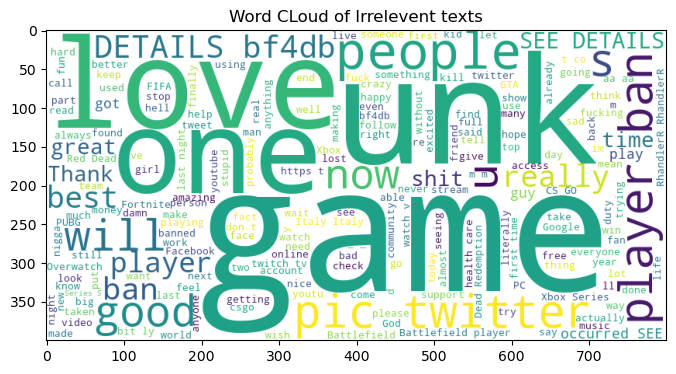

In [14]:
irrelevent = df[df['Sentiment'] == 'Irrelevant']
irrelevent_text = ''.join(irrelevent['Texts'].astype(str))
irrelevent_wc = WordCloud(height = 400, width = 800, background_color = 'white').generate(irrelevent_text)
plt.figure(figsize = (8,6))
plt.imshow(irrelevent_wc)
plt.title('Word CLoud of Irrelevent texts')
plt.show()

#### Encoding and splitting features

In [15]:
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])
X = df['Texts']
y = df['Sentiment']
#0 = Irrelevant
#3 = Positive
# 2 = Neutral
#1 = Negative

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [18]:
nb_model = MultinomialNB()
nb_model.fit(x_train_vec, y_train)

MultinomialNB()

In [19]:
print('Multinomial Model')
x_pred = nb_model.predict(x_train_vec)
print(f'Train Accuracy: {accuracy_score(y_train, x_pred):.2%}')

y_pred = nb_model.predict(x_test_vec)
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.2%}')

Multinomial Model
Train Accuracy: 79.78%
Test accuracy: 75.36%


In [20]:
clf = DecisionTreeClassifier()
clf.fit(x_train_vec, y_train)

DecisionTreeClassifier()

In [21]:
print('Decision Tree Classifier ')
x_pred = clf.predict(x_train_vec)
print(f'Train Accuracy: {accuracy_score(y_train, x_pred):.2%}')

y_pred = clf.predict(x_test_vec)
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.2%}')

Decision Tree Classifier 
Train Accuracy: 98.03%
Test accuracy: 78.94%


In [22]:
#Positive: "Just got a new job! Feeling on top of the world right now!"
#Negative: "Just heard that the concert I’ve been looking forward to for months got canceled. So disappointed"
#Neutral: "is doesn’t should I give up its password ‘crypto wallet docs maxbit.cc/nvidia-doesnt-…"
#Irrelevant: "Let’s see how well they handle the next one when supply chains are hedged"

In [24]:
new_tweet = ["Just got a new job! Feeling on top of the world right now!"]
new_tweet_vec = vectorizer.transform(new_tweet)
new_pred = clf.predict(new_tweet_vec)
if new_pred == 0:
    print('The tweet is Irrelevant')
elif new_pred == 1:
    print('The tweet is negative')
elif new_pred == 2:
    print('The tweet is Neutral')
else:
    print('The tweet is Positive')

The tweet is Positive
